In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
print(tf.__version__)

2.15.0


In [3]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-27 07:06:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  31.3MB/s    in 3.3s    

2024-02-27 07:06:40 (31.3 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [4]:
!ls pizza_steak


test  train


In [5]:
!ls pizza_steak/train/


pizza  steak


In [6]:
!ls pizza_steak/train/steak/


1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (512, 512, 3)


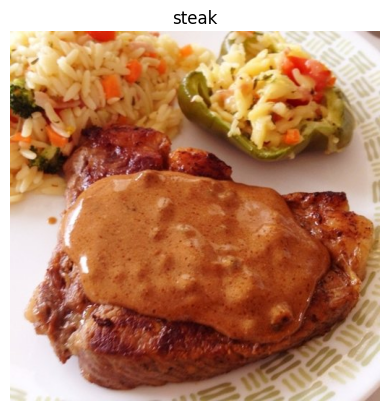

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"),
# padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
              metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training when validation loss doesn't improve for 3 epochs

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks = [early_stopping]
                        # callbacks =[lr_scheduler] )
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/50
47/47 [==============================] - 16s 220ms/step - loss: 0.5745 - accuracy: 0.7187 - val_loss: 0.4209 - val_accuracy: 0.8080
Epoch 2/50
47/47 [==============================] - 6s 127ms/step - loss: 0.4535 - accuracy: 0.7973 - val_loss: 0.3899 - val_accuracy: 0.8160
Epoch 3/50
47/47 [==============================] - 7s 151ms/step - loss: 0.4184 - accuracy: 0.8080 - val_loss: 0.4087 - val_accuracy: 0.8040
Epoch 4/50
47/47 [==============================] - 6s 128ms/step - loss: 0.4057 - accuracy: 0.8247 - val_loss: 0.3617 - val_accuracy: 0.8620
Epoch 5/50
47/47 [==============================] - 7s 138ms/step - loss: 0.3508 - accuracy: 0.8560 - val_loss: 0.3027 - val_accuracy: 0.8660
Epoch 6/50
47/47 [==============================] - 6s 129ms/step - loss: 0.2742 - accuracy: 0.8827 - val_loss: 0.3948 - val_accuracy: 0.8220
Epoch 8/50
47/47 [==============================] - 7s 148ms/ste

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,7), xlabel="epochs");


In [ ]:
lrs = 1e-4 * (10 ** (np.arange(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_1.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("aLoss")
plt.title("Learning rate vs. loss");

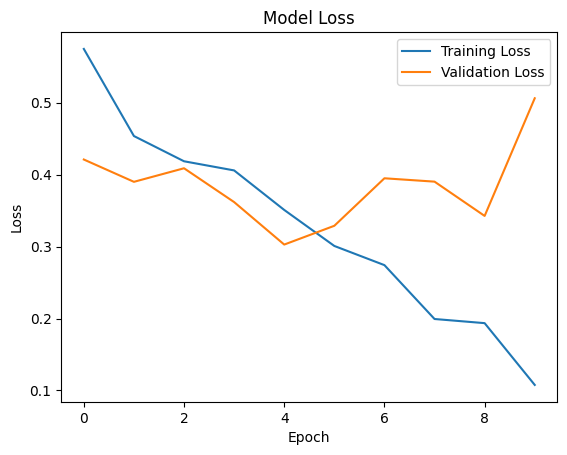

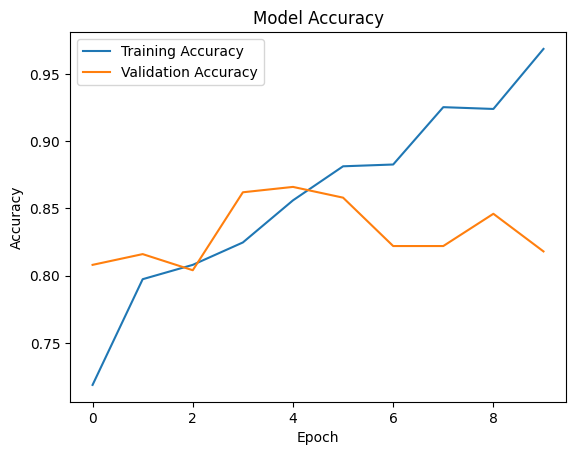

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
train_pred = model_1.predict(train_data)
valid_pred = model_1.predict(valid_data)

# Convert predictions to binary classes
train_pred_classes = np.round(train_pred)
valid_pred_classes = np.round(valid_pred)

# Get true labels
train_true = train_data.classes
valid_true = valid_data.classes


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred_classes)
train_precision = precision_score(train_true, train_pred_classes)
train_recall = recall_score(train_true, train_pred_classes)
train_f1 = f1_score(train_true, train_pred_classes)

# Calculate metrics for validation set
valid_accuracy = accuracy_score(valid_true, valid_pred_classes)
valid_precision = precision_score(valid_true, valid_pred_classes)
valid_recall = recall_score(valid_true, valid_pred_classes)
valid_f1 = f1_score(valid_true, valid_pred_classes)

# Create a dataframe
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, valid_accuracy],
    'Precision': [train_precision, valid_precision],
    'Recall': [train_recall, valid_recall],
    'F1-score': [train_f1, valid_f1]
})

print(metrics_df)



16/16 [==============================] - 1s 87ms/step
      Dataset  Accuracy  Precision    Recall  F1-score
0    Training  0.481333   0.482097  0.502667  0.492167
1  Validation  0.542000   0.536332  0.620000  0.575139


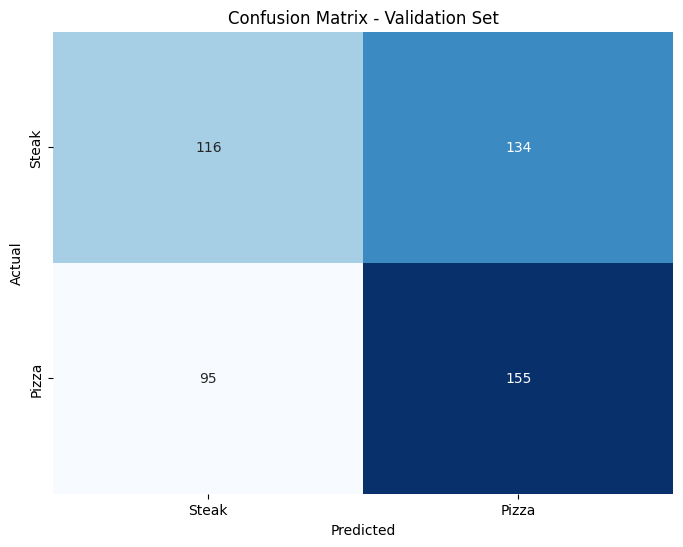


Confusion Matrix - Validation Set:
              Predicted Steak  Predicted Pizza
Actual Steak              116              134
Actual Pizza               95              155


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
valid_confusion_matrix = confusion_matrix(valid_true, valid_pred_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(valid_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Steak', 'Pizza'], yticklabels=['Steak', 'Pizza'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dataframe for confusion matrix
confusion_matrix_df = pd.DataFrame(valid_confusion_matrix, columns=['Predicted Steak', 'Predicted Pizza'],
                                   index=['Actual Steak', 'Actual Pizza'])
print("\nConfusion Matrix - Validation Set:")
print(confusion_matrix_df)

Another Model


In [69]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training when validation loss doesn't improve for 3 epochs

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data),
                        callbacks = [early_stopping])

Epoch 1/50
47/47 [==============================] - 8s 138ms/step - loss: 0.7066 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
47/47 [==============================] - 11s 244ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
47/47 [==============================] - 7s 148ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
47/47 [==============================] - 7s 152ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.4613 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch

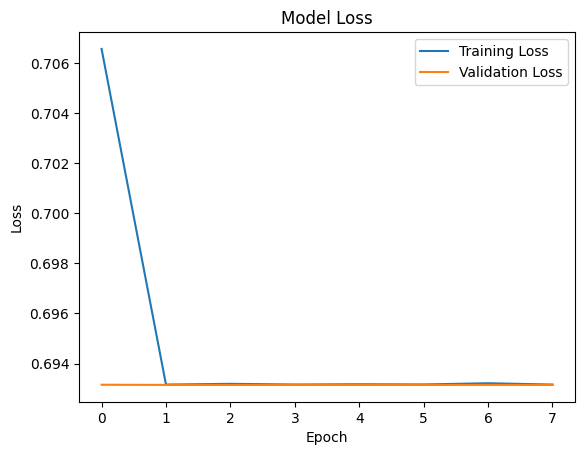

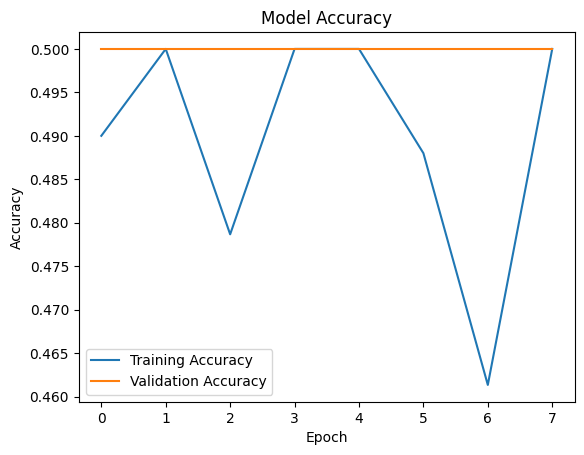

In [71]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [72]:
train_pred = model_2.predict(train_data)
valid_pred = model_2.predict(valid_data)

# Convert predictions to binary classes
train_pred_classes = np.round(train_pred)
valid_pred_classes = np.round(valid_pred)

# Get true labels
train_true = train_data.classes
valid_true = valid_data.classes


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred_classes)
train_precision = precision_score(train_true, train_pred_classes)
train_recall = recall_score(train_true, train_pred_classes)
train_f1 = f1_score(train_true, train_pred_classes)

# Calculate metrics for validation set
valid_accuracy = accuracy_score(valid_true, valid_pred_classes)
valid_precision = precision_score(valid_true, valid_pred_classes)
valid_recall = recall_score(valid_true, valid_pred_classes)
valid_f1 = f1_score(valid_true, valid_pred_classes)

# Create a dataframe
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, valid_accuracy],
    'Precision': [train_precision, valid_precision],
    'Recall': [train_recall, valid_recall],
    'F1-score': [train_f1, valid_f1]
})

print(metrics_df)


16/16 [==============================] - 1s 86ms/step
      Dataset  Accuracy  Precision  Recall  F1-score
0    Training       0.5        0.5     1.0  0.666667
1  Validation       0.5        0.5     1.0  0.666667


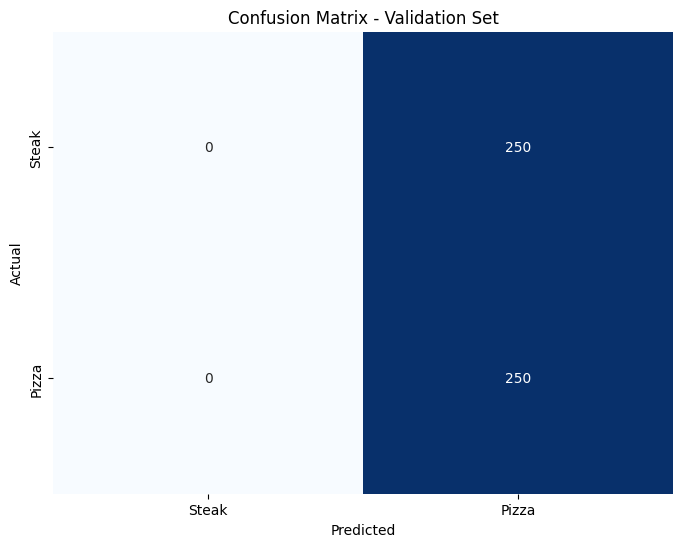


Confusion Matrix - Validation Set:
              Predicted Steak  Predicted Pizza
Actual Steak                0              250
Actual Pizza                0              250


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
valid_confusion_matrix = confusion_matrix(valid_true, valid_pred_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(valid_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Steak', 'Pizza'], yticklabels=['Steak', 'Pizza'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dataframe for confusion matrix
confusion_matrix_df = pd.DataFrame(valid_confusion_matrix, columns=['Predicted Steak', 'Predicted Pizza'],
                                   index=['Actual Steak', 'Actual Pizza'])
print("\nConfusion Matrix - Validation Set:")
print(confusion_matrix_df)

Model3

In [77]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training when validation loss doesn't improve for 3 epochs


# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks = [early_stopping])

Epoch 1/50
47/47 [==============================] - 10s 156ms/step - loss: 3.4719 - accuracy: 0.6067 - val_loss: 0.7781 - val_accuracy: 0.7040
Epoch 2/50
47/47 [==============================] - 7s 144ms/step - loss: 0.8209 - accuracy: 0.6893 - val_loss: 0.7879 - val_accuracy: 0.6640
Epoch 3/50
47/47 [==============================] - 10s 204ms/step - loss: 1.0957 - accuracy: 0.6793 - val_loss: 0.5630 - val_accuracy: 0.7920
Epoch 4/50
47/47 [==============================] - 12s 265ms/step - loss: 0.5953 - accuracy: 0.7687 - val_loss: 0.5746 - val_accuracy: 0.6820
Epoch 5/50
47/47 [==============================] - 6s 119ms/step - loss: 0.5278 - accuracy: 0.7713 - val_loss: 0.5533 - val_accuracy: 0.7380
Epoch 6/50
47/47 [==============================] - 8s 170ms/step - loss: 0.5251 - accuracy: 0.7813 - val_loss: 0.4369 - val_accuracy: 0.7900
Epoch 7/50
47/47 [==============================] - 10s 224ms/step - loss: 0.3911 - accuracy: 0.8300 - val_loss: 0.4311 - val_accuracy: 0.8020
Ep

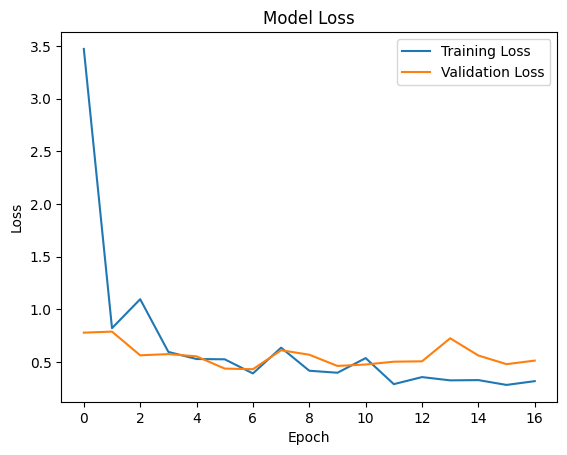

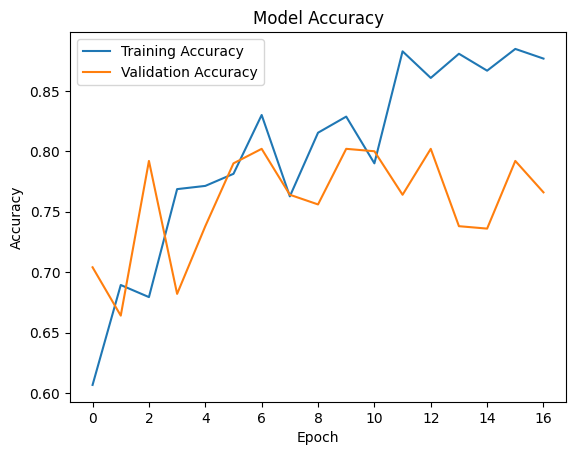

In [78]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [79]:
train_pred = model_3.predict(train_data)
valid_pred = model_3.predict(valid_data)

# Convert predictions to binary classes
train_pred_classes = np.round(train_pred)
valid_pred_classes = np.round(valid_pred)

# Get true labels
train_true = train_data.classes
valid_true = valid_data.classes


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred_classes)
train_precision = precision_score(train_true, train_pred_classes)
train_recall = recall_score(train_true, train_pred_classes)
train_f1 = f1_score(train_true, train_pred_classes)

# Calculate metrics for validation set
valid_accuracy = accuracy_score(valid_true, valid_pred_classes)
valid_precision = precision_score(valid_true, valid_pred_classes)
valid_recall = recall_score(valid_true, valid_pred_classes)
valid_f1 = f1_score(valid_true, valid_pred_classes)

# Create a dataframe
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, valid_accuracy],
    'Precision': [train_precision, valid_precision],
    'Recall': [train_recall, valid_recall],
    'F1-score': [train_f1, valid_f1]
})

print(metrics_df)


16/16 [==============================] - 1s 86ms/step
      Dataset  Accuracy  Precision    Recall  F1-score
0    Training     0.516   0.514670  0.561333  0.536990
1  Validation     0.486   0.488055  0.572000  0.526703


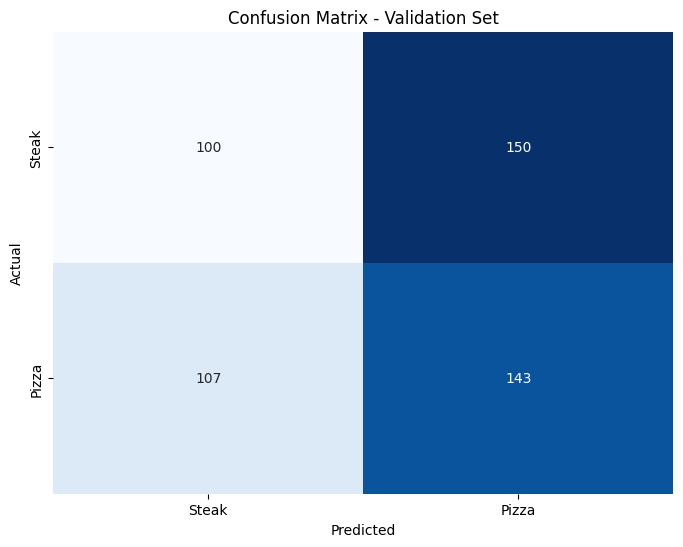


Confusion Matrix - Validation Set:
              Predicted Steak  Predicted Pizza
Actual Steak              100              150
Actual Pizza              107              143


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
valid_confusion_matrix = confusion_matrix(valid_true, valid_pred_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(valid_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Steak', 'Pizza'], yticklabels=['Steak', 'Pizza'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dataframe for confusion matrix
confusion_matrix_df = pd.DataFrame(valid_confusion_matrix, columns=['Predicted Steak', 'Predicted Pizza'],
                                   index=['Actual Steak', 'Actual Pizza'])
print("\nConfusion Matrix - Validation Set:")
print(confusion_matrix_df)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential


In [24]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Dropout(0.3),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training when validation loss doesn't improve for 3 epochs

history_4 = model_4.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks = [early_stopping])

Epoch 1/50
47/47 [==============================] - 11s 163ms/step - loss: 1.0882 - accuracy: 0.5587 - val_loss: 0.5217 - val_accuracy: 0.7700
Epoch 2/50
47/47 [==============================] - 6s 133ms/step - loss: 0.4597 - accuracy: 0.7927 - val_loss: 0.3896 - val_accuracy: 0.8460
Epoch 3/50
47/47 [==============================] - 7s 154ms/step - loss: 0.3845 - accuracy: 0.8433 - val_loss: 0.4040 - val_accuracy: 0.8280
Epoch 4/50
47/47 [==============================] - 6s 129ms/step - loss: 0.2307 - accuracy: 0.9233 - val_loss: 0.4242 - val_accuracy: 0.7960
Epoch 5/50
47/47 [==============================] - 7s 153ms/step - loss: 0.1525 - accuracy: 0.9600 - val_loss: 0.4491 - val_accuracy: 0.7920
Epoch 6/50
47/47 [==============================] - 7s 158ms/step - loss: 0.0757 - accuracy: 0.9820 - val_loss: 0.4285 - val_accuracy: 0.8200
Epoch 7/50
47/47 [==============================] - 7s 147ms/step - loss: 0.0394 - accuracy: 0.9953 - val_loss: 0.5578 - val_accuracy: 0.8040
Epoch

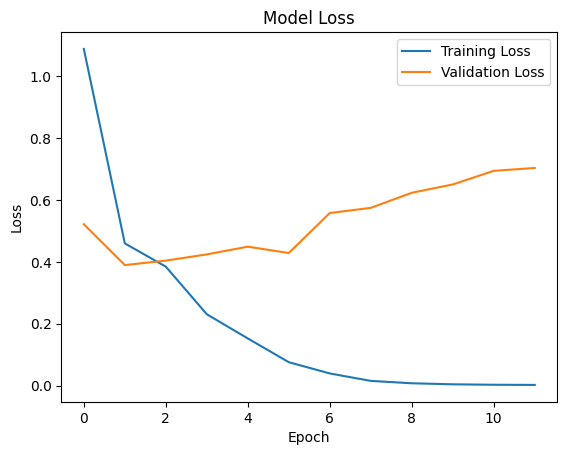

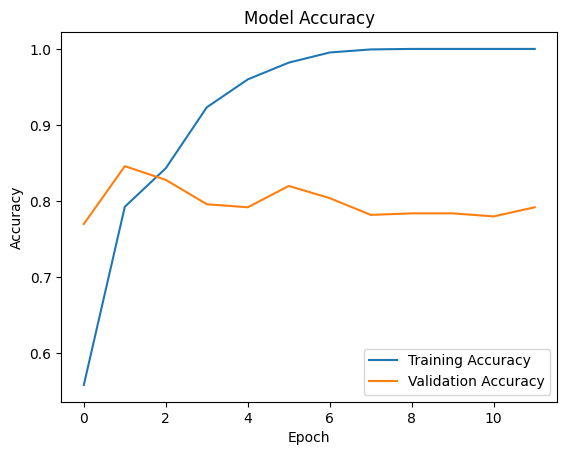

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
train_pred = model_4.predict(train_data)
valid_pred = model_4.predict(valid_data)

# Convert predictions to binary classes
train_pred_classes = np.round(train_pred)
valid_pred_classes = np.round(valid_pred)

# Get true labels
train_true = train_data.classes
valid_true = valid_data.classes


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred_classes)
train_precision = precision_score(train_true, train_pred_classes)
train_recall = recall_score(train_true, train_pred_classes)
train_f1 = f1_score(train_true, train_pred_classes)

# Calculate metrics for validation set
valid_accuracy = accuracy_score(valid_true, valid_pred_classes)
valid_precision = precision_score(valid_true, valid_pred_classes)
valid_recall = recall_score(valid_true, valid_pred_classes)
valid_f1 = f1_score(valid_true, valid_pred_classes)

# Create a dataframe
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, valid_accuracy],
    'Precision': [train_precision, valid_precision],
    'Recall': [train_recall, valid_recall],
    'F1-score': [train_f1, valid_f1]
})

print(metrics_df)


16/16 [==============================] - 1s 89ms/step
      Dataset  Accuracy  Precision    Recall  F1-score
0    Training  0.529333   0.529333  0.529333  0.529333
1  Validation  0.516000   0.517699  0.468000  0.491597


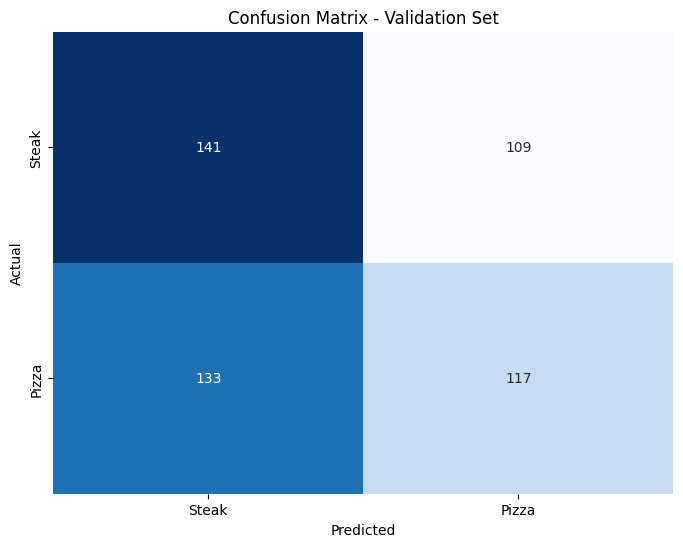


Confusion Matrix - Validation Set:
              Predicted Steak  Predicted Pizza
Actual Steak              141              109
Actual Pizza              133              117


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
valid_confusion_matrix = confusion_matrix(valid_true, valid_pred_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(valid_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Steak', 'Pizza'], yticklabels=['Steak', 'Pizza'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dataframe for confusion matrix
confusion_matrix_df = pd.DataFrame(valid_confusion_matrix, columns=['Predicted Steak', 'Predicted Pizza'],
                                   index=['Actual Steak', 'Actual Pizza'])
print("\nConfusion Matrix - Validation Set:")
print(confusion_matrix_df)

Model5

In [28]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training when validation loss doesn't improve for 3 epochs


history_5 = model_5.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks = [early_stopping])

Epoch 1/50
47/47 [==============================] - 9s 155ms/step - loss: 0.5864 - accuracy: 0.6967 - val_loss: 0.4981 - val_accuracy: 0.7580
Epoch 2/50
47/47 [==============================] - 14s 297ms/step - loss: 0.4604 - accuracy: 0.7980 - val_loss: 0.4035 - val_accuracy: 0.8420
Epoch 3/50
47/47 [==============================] - 8s 169ms/step - loss: 0.4389 - accuracy: 0.8073 - val_loss: 0.3816 - val_accuracy: 0.8600
Epoch 4/50
47/47 [==============================] - 12s 255ms/step - loss: 0.4122 - accuracy: 0.8180 - val_loss: 0.3872 - val_accuracy: 0.8240
Epoch 5/50
47/47 [==============================] - 6s 131ms/step - loss: 0.3887 - accuracy: 0.8220 - val_loss: 0.3212 - val_accuracy: 0.8780
Epoch 6/50
47/47 [==============================] - 6s 137ms/step - loss: 0.3783 - accuracy: 0.8307 - val_loss: 0.3204 - val_accuracy: 0.8600
Epoch 7/50
47/47 [==============================] - 7s 142ms/step - loss: 0.3594 - accuracy: 0.8460 - val_loss: 0.3327 - val_accuracy: 0.8580
Epoc

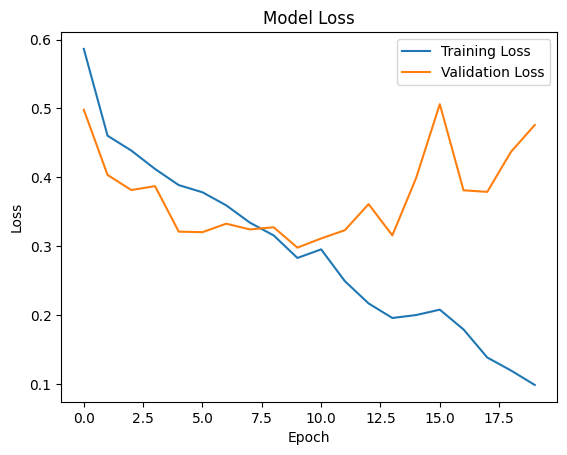

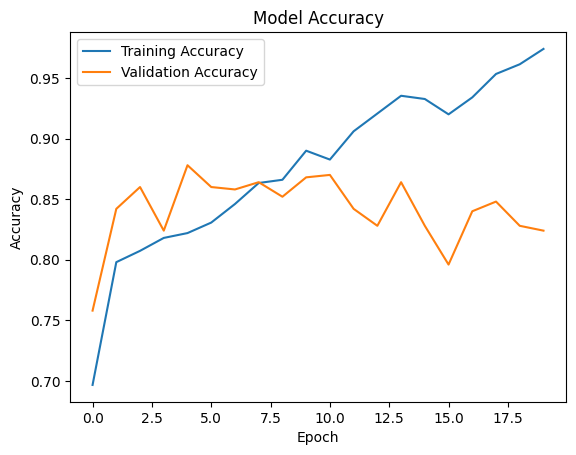

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_5.history['loss'], label='Training Loss')
plt.plot(history_5.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_5.history['accuracy'], label='Training Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


16/16 [==============================] - 1s 87ms/step
      Dataset  Accuracy  Precision    Recall  F1-score
0    Training     0.514   0.514247  0.505333  0.509751
1  Validation     0.508   0.508929  0.456000  0.481013


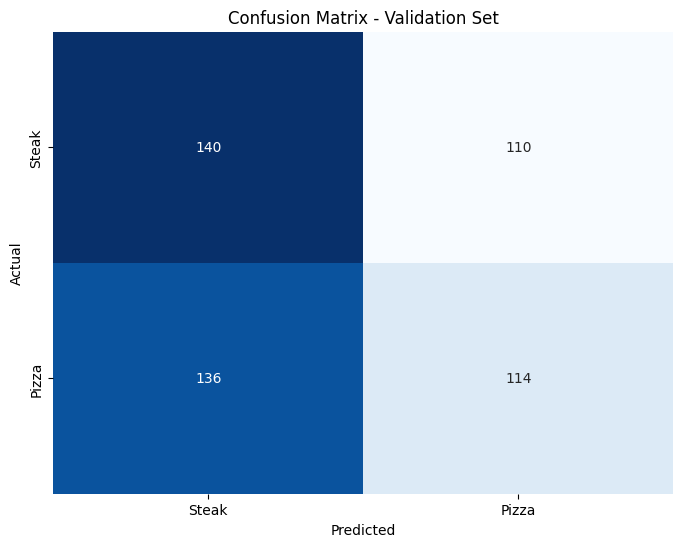


Confusion Matrix - Validation Set:
              Predicted Steak  Predicted Pizza
Actual Steak              140              110
Actual Pizza              136              114


In [30]:
train_pred = model_5.predict(train_data)
valid_pred = model_5.predict(valid_data)

# Convert predictions to binary classes
train_pred_classes = np.round(train_pred)
valid_pred_classes = np.round(valid_pred)

# Get true labels
train_true = train_data.classes
valid_true = valid_data.classes


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred_classes)
train_precision = precision_score(train_true, train_pred_classes)
train_recall = recall_score(train_true, train_pred_classes)
train_f1 = f1_score(train_true, train_pred_classes)

# Calculate metrics for validation set
valid_accuracy = accuracy_score(valid_true, valid_pred_classes)
valid_precision = precision_score(valid_true, valid_pred_classes)
valid_recall = recall_score(valid_true, valid_pred_classes)
valid_f1 = f1_score(valid_true, valid_pred_classes)

# Create a dataframe
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, valid_accuracy],
    'Precision': [train_precision, valid_precision],
    'Recall': [train_recall, valid_recall],
    'F1-score': [train_f1, valid_f1]
})

print(metrics_df)


import seaborn as sns
import matplotlib.pyplot as plt
valid_confusion_matrix = confusion_matrix(valid_true, valid_pred_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(valid_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Steak', 'Pizza'], yticklabels=['Steak', 'Pizza'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dataframe for confusion matrix
confusion_matrix_df = pd.DataFrame(valid_confusion_matrix, columns=['Predicted Steak', 'Predicted Pizza'],
                                   index=['Actual Steak', 'Actual Pizza'])
print("\nConfusion Matrix - Validation Set:")
print(confusion_matrix_df)

In [31]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [35]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Dropout(0.2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
    Dropout(0.2),

  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
    Dropout(0.2),

  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=50,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks = [early_stopping])

Epoch 1/50
47/47 [==============================] - 38s 754ms/step - loss: 0.7210 - accuracy: 0.5013 - val_loss: 0.6886 - val_accuracy: 0.5420
Epoch 2/50
47/47 [==============================] - 23s 490ms/step - loss: 0.6908 - accuracy: 0.5060 - val_loss: 0.6768 - val_accuracy: 0.5020
Epoch 3/50
47/47 [==============================] - 23s 494ms/step - loss: 0.6986 - accuracy: 0.5207 - val_loss: 0.6796 - val_accuracy: 0.6000
Epoch 4/50
47/47 [==============================] - 24s 506ms/step - loss: 0.6768 - accuracy: 0.5967 - val_loss: 0.6414 - val_accuracy: 0.6820
Epoch 5/50
47/47 [==============================] - 22s 474ms/step - loss: 0.6756 - accuracy: 0.5687 - val_loss: 0.6361 - val_accuracy: 0.5820
Epoch 6/50
47/47 [==============================] - 23s 487ms/step - loss: 0.6442 - accuracy: 0.6307 - val_loss: 0.5913 - val_accuracy: 0.7220
Epoch 7/50
47/47 [==============================] - 29s 622ms/step - loss: 0.6319 - accuracy: 0.6333 - val_loss: 0.5566 - val_accuracy: 0.7160

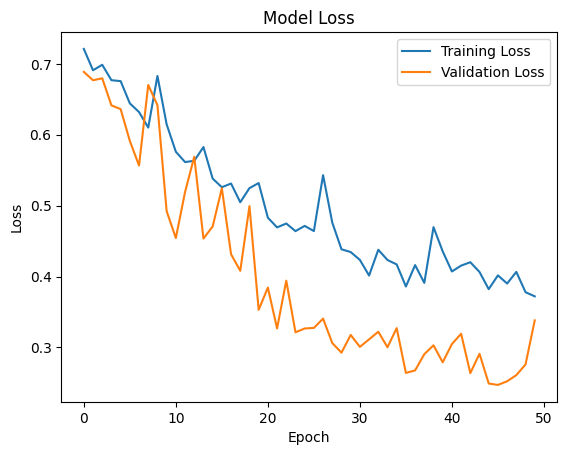

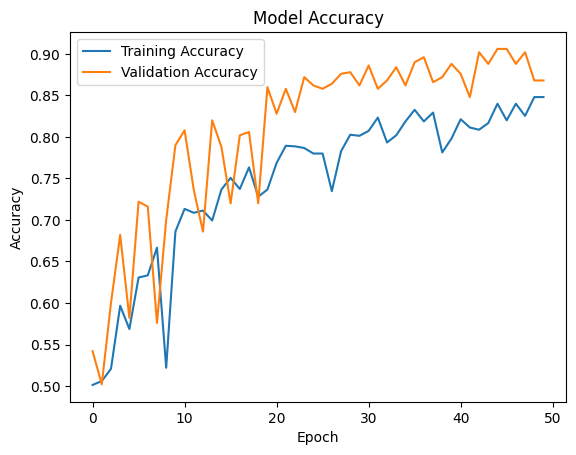

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_6.history['loss'], label='Training Loss')
plt.plot(history_6.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_6.history['accuracy'], label='Training Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


16/16 [==============================] - 3s 190ms/step
      Dataset  Accuracy  Precision  Recall  F1-score
0    Training     0.846   0.781759   0.960  0.861759
1  Validation     0.500   0.500000   0.604  0.547101


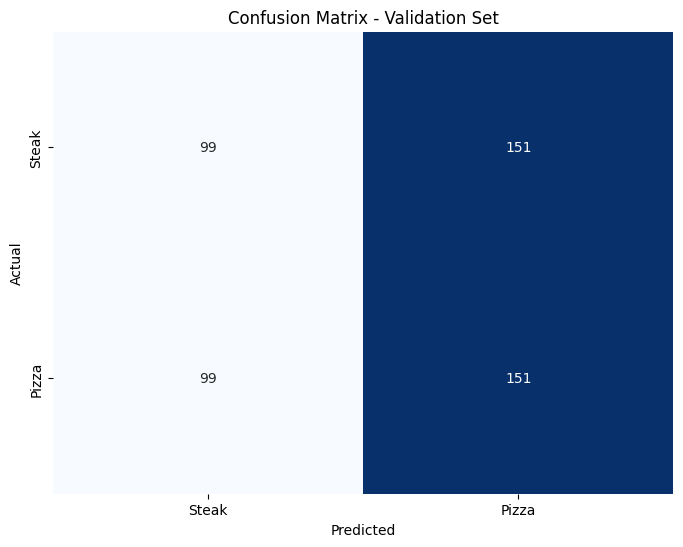


Confusion Matrix - Validation Set:
              Predicted Steak  Predicted Pizza
Actual Steak               99              151
Actual Pizza               99              151


In [37]:
train_pred = model_6.predict(train_data)
valid_pred = model_6.predict(valid_data)

# Convert predictions to binary classes
train_pred_classes = np.round(train_pred)
valid_pred_classes = np.round(valid_pred)

# Get true labels
train_true = train_data.classes
valid_true = valid_data.classes


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred_classes)
train_precision = precision_score(train_true, train_pred_classes)
train_recall = recall_score(train_true, train_pred_classes)
train_f1 = f1_score(train_true, train_pred_classes)

# Calculate metrics for validation set
valid_accuracy = accuracy_score(valid_true, valid_pred_classes)
valid_precision = precision_score(valid_true, valid_pred_classes)
valid_recall = recall_score(valid_true, valid_pred_classes)
valid_f1 = f1_score(valid_true, valid_pred_classes)

# Create a dataframe
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, valid_accuracy],
    'Precision': [train_precision, valid_precision],
    'Recall': [train_recall, valid_recall],
    'F1-score': [train_f1, valid_f1]
})

print(metrics_df)


import seaborn as sns
import matplotlib.pyplot as plt
valid_confusion_matrix = confusion_matrix(valid_true, valid_pred_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(valid_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Steak', 'Pizza'], yticklabels=['Steak', 'Pizza'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dataframe for confusion matrix
confusion_matrix_df = pd.DataFrame(valid_confusion_matrix, columns=['Predicted Steak', 'Predicted Pizza'],
                                   index=['Actual Steak', 'Actual Pizza'])
print("\nConfusion Matrix - Validation Set:")
print(confusion_matrix_df)

Model7

In [38]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [40]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
   Dropout(0.2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
   Dropout(0.2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
   Dropout(0.2),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=50,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks = [early_stopping])

Epoch 1/50
47/47 [==============================] - 51s 977ms/step - loss: 0.6358 - accuracy: 0.6427 - val_loss: 0.6105 - val_accuracy: 0.7180
Epoch 2/50
47/47 [==============================] - 24s 509ms/step - loss: 0.6057 - accuracy: 0.6800 - val_loss: 0.5545 - val_accuracy: 0.8000
Epoch 3/50
47/47 [==============================] - 25s 524ms/step - loss: 0.5667 - accuracy: 0.7207 - val_loss: 0.5043 - val_accuracy: 0.8200
Epoch 4/50
47/47 [==============================] - 22s 471ms/step - loss: 0.5139 - accuracy: 0.7520 - val_loss: 0.5029 - val_accuracy: 0.7740
Epoch 5/50
47/47 [==============================] - 24s 497ms/step - loss: 0.5076 - accuracy: 0.7633 - val_loss: 0.4863 - val_accuracy: 0.8080
Epoch 6/50
47/47 [==============================] - 25s 540ms/step - loss: 0.5079 - accuracy: 0.7620 - val_loss: 0.4831 - val_accuracy: 0.7780
Epoch 7/50
47/47 [==============================] - 24s 502ms/step - loss: 0.5105 - accuracy: 0.7567 - val_loss: 0.4600 - val_accuracy: 0.8320

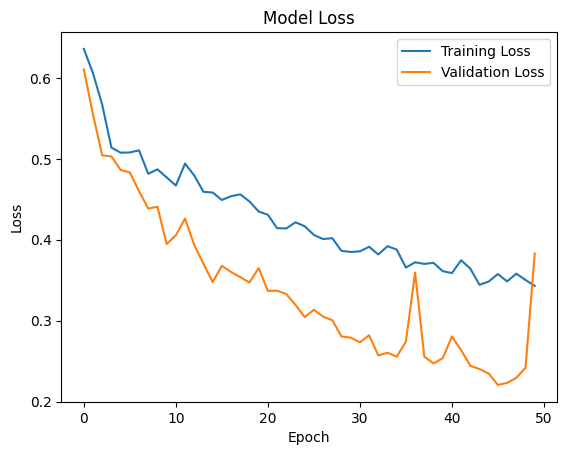

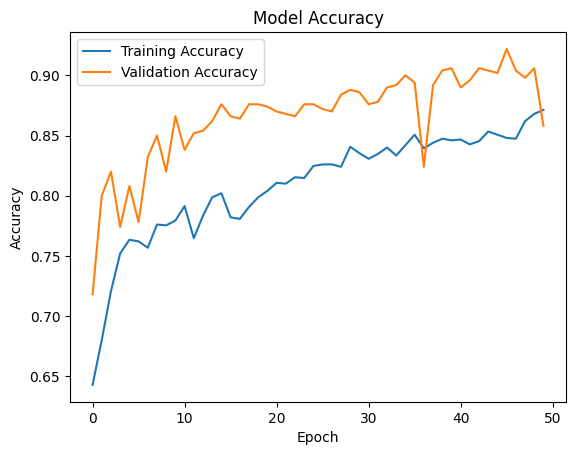

In [41]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_7.history['loss'], label='Training Loss')
plt.plot(history_7.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_7.history['accuracy'], label='Training Accuracy')
plt.plot(history_7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


16/16 [==============================] - 1s 88ms/step
      Dataset  Accuracy  Precision  Recall  F1-score
0    Training  0.845333   0.779095   0.964  0.861740
1  Validation  0.510000   0.508091   0.628  0.561717


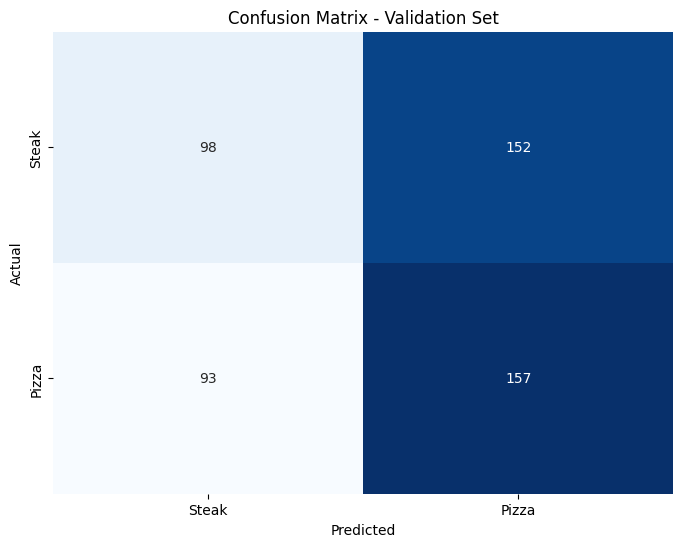


Confusion Matrix - Validation Set:
              Predicted Steak  Predicted Pizza
Actual Steak               98              152
Actual Pizza               93              157


In [42]:
train_pred = model_7.predict(train_data)
valid_pred = model_7.predict(valid_data)

# Convert predictions to binary classes
train_pred_classes = np.round(train_pred)
valid_pred_classes = np.round(valid_pred)

# Get true labels
train_true = train_data.classes
valid_true = valid_data.classes


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred_classes)
train_precision = precision_score(train_true, train_pred_classes)
train_recall = recall_score(train_true, train_pred_classes)
train_f1 = f1_score(train_true, train_pred_classes)

# Calculate metrics for validation set
valid_accuracy = accuracy_score(valid_true, valid_pred_classes)
valid_precision = precision_score(valid_true, valid_pred_classes)
valid_recall = recall_score(valid_true, valid_pred_classes)
valid_f1 = f1_score(valid_true, valid_pred_classes)

# Create a dataframe
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, valid_accuracy],
    'Precision': [train_precision, valid_precision],
    'Recall': [train_recall, valid_recall],
    'F1-score': [train_f1, valid_f1]
})

print(metrics_df)


import seaborn as sns
import matplotlib.pyplot as plt
valid_confusion_matrix = confusion_matrix(valid_true, valid_pred_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(valid_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Steak', 'Pizza'], yticklabels=['Steak', 'Pizza'])
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dataframe for confusion matrix
confusion_matrix_df = pd.DataFrame(valid_confusion_matrix, columns=['Predicted Steak', 'Predicted Pizza'],
                                   index=['Actual Steak', 'Actual Pizza'])
print("\nConfusion Matrix - Validation Set:")
print(confusion_matrix_df)